# Perform EDA On The Data set

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("../data/combined_pump_timeseries (1).csv")


In [53]:
df.shape

(720050, 7)

In [75]:
df.columns

Index(['timestamp', 'pump_throughput_m3ph', 'operating_pressure_bar',
       'vibration_mm_s', 'bearing_temp_C', 'status', 'pump_number', 'hour',
       'minute', 'day'],
      dtype='object')

In [54]:
df.head()

,timestamp,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,status,pump_number
0,2025-04-15 20:14:00.388595,101.948189,9.911733,1.151807,63.317134,RUNNING,1
1,2025-04-15 20:24:00.388595,97.350999,10.015090,1.222389,67.622323,RUNNING,1
2,2025-04-15 20:34:00.388595,98.642862,9.890661,1.284898,67.834281,RUNNING,1
3,2025-04-15 20:44:00.388595,101.125591,10.136244,1.010065,64.876550,RUNNING,1
4,2025-04-15 20:54:00.388595,102.167705,10.048706,0.981551,69.590331,RUNNING,1


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720050 entries, 0 to 720049
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   timestamp               720050 non-null  object 
 1   pump_throughput_m3ph    720050 non-null  float64
 2   operating_pressure_bar  720050 non-null  float64
 3   vibration_mm_s          720050 non-null  float64
 4   bearing_temp_C          720050 non-null  float64
 5   status                  720050 non-null  object 
 6   pump_number             720050 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 38.5+ MB


In [56]:
df.describe()


,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,pump_number
count,720050.000000,720050.000000,720050.000000,720050.000000,720050.00000
mean,93.156963,9.127803,1.244187,63.878201,25.50000
std,25.236050,2.497118,0.473408,11.645467,14.43088
min,0.000000,0.000000,0.000000,20.000154,1.00000
25%,96.969297,9.383827,1.040613,62.215621,13.00000
50%,99.567912,9.765681,1.291071,66.091074,25.50000
75%,101.981651,10.093015,1.535483,69.812705,38.00000
max,117.049782,12.047137,3.241878,96.225883,50.00000


### Convert timestamp to datetime + add useful time features

In [57]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['day'] = df['timestamp'].dt.date


In [58]:
df.isna().sum()


timestamp                 0
pump_throughput_m3ph      0
operating_pressure_bar    0
vibration_mm_s            0
bearing_temp_C            0
status                    0
pump_number               0
hour                      0
minute                    0
day                       0
dtype: int64

### Numerical Distribution

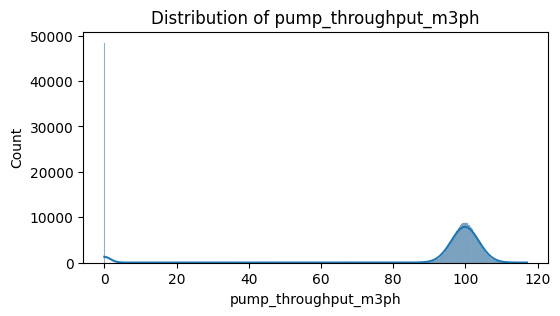

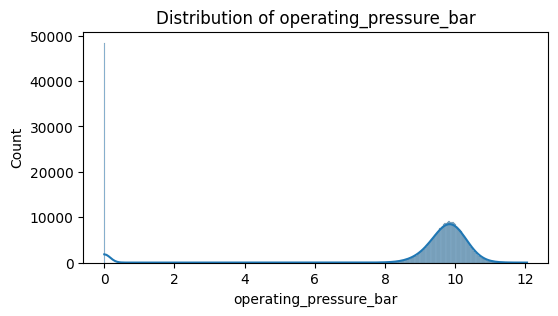

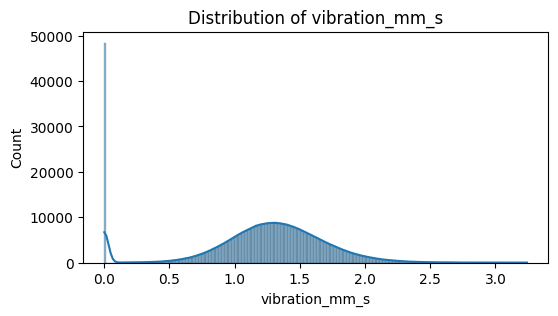

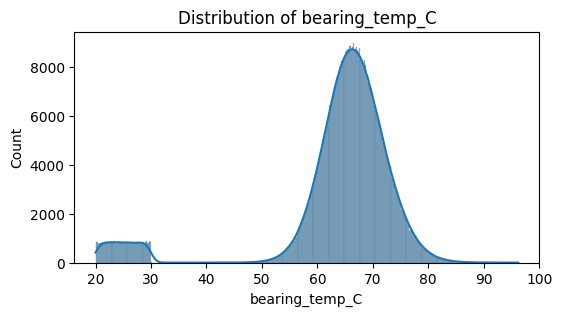

In [59]:


num_cols = ['pump_throughput_m3ph','operating_pressure_bar',
            'vibration_mm_s','bearing_temp_C']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### Correlation Analysis

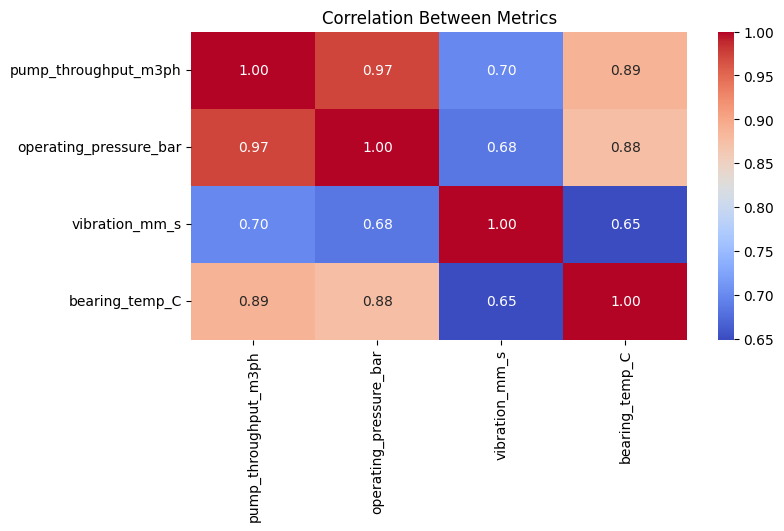

In [60]:
plt.figure(figsize=(8,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Metrics")
plt.show()


### Analysis

## Time-Series Visualization

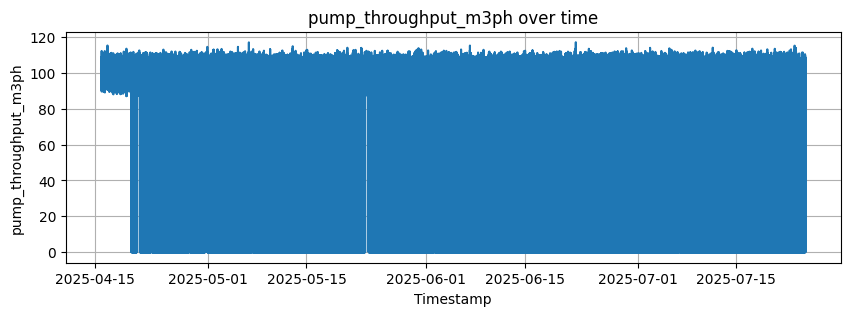

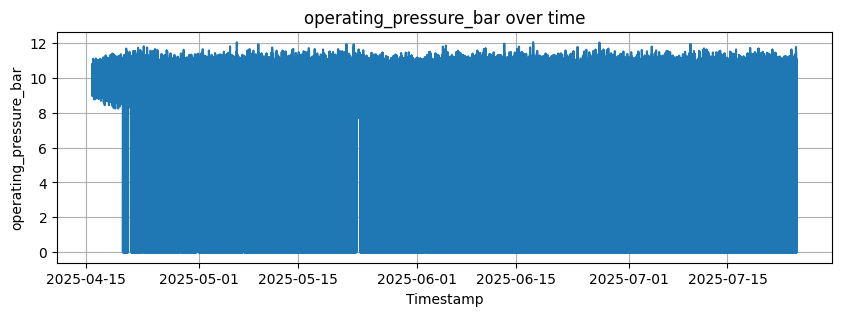

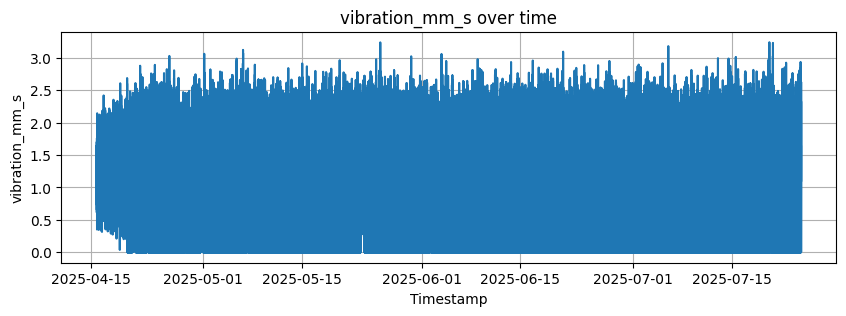

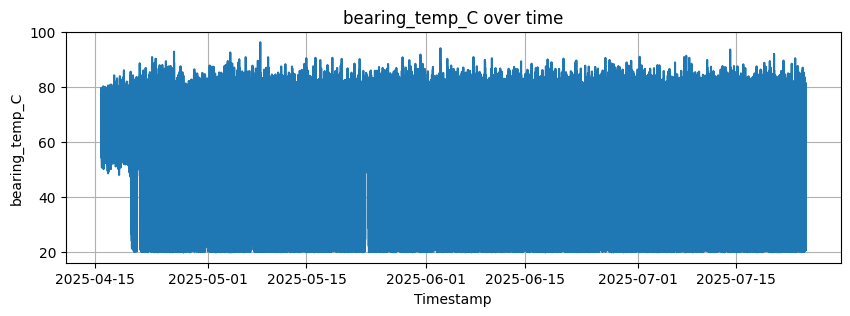

In [61]:
for col in num_cols:
    plt.figure(figsize=(10,3))
    plt.plot(df['timestamp'], df[col])
    plt.title(f"{col} over time")
    plt.xlabel("Timestamp")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


In [62]:
df['status'].value_counts()


status
RUNNING    671600
DOWN        48450
Name: count, dtype: int64

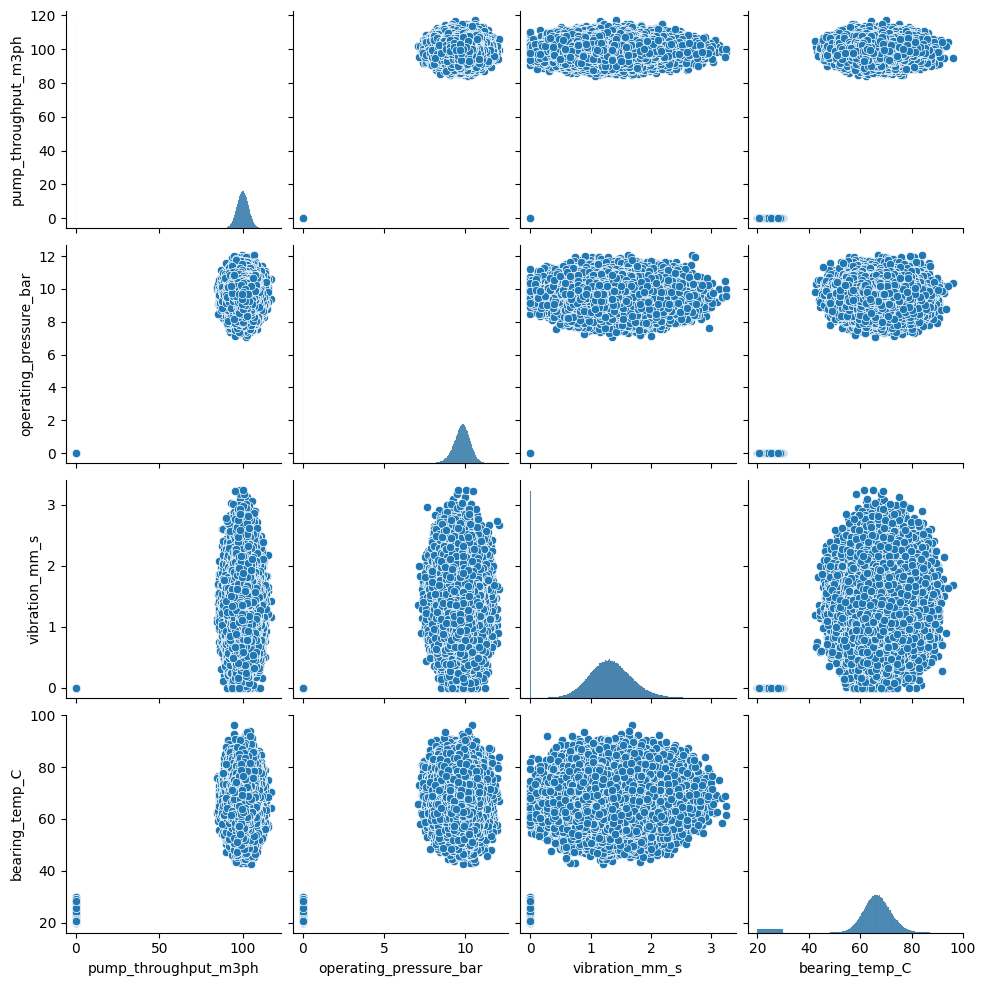

In [63]:
sns.pairplot(df[num_cols])


In [64]:
df.columns

Index(['timestamp', 'pump_throughput_m3ph', 'operating_pressure_bar',
       'vibration_mm_s', 'bearing_temp_C', 'status', 'pump_number', 'hour',
       'minute', 'day'],
      dtype='object')

In [65]:
features = ["pump_throughput_m3ph", "operating_pressure_bar", "vibration_mm_s" , 'bearing_temp_C', 'status', 'pump_number',]

### Compare Velocity During Failure vs Running

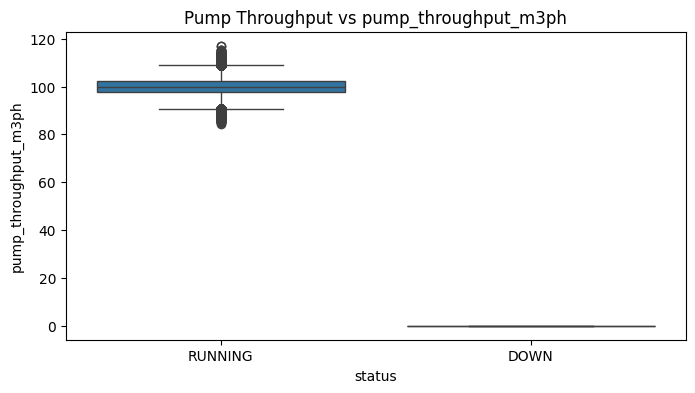

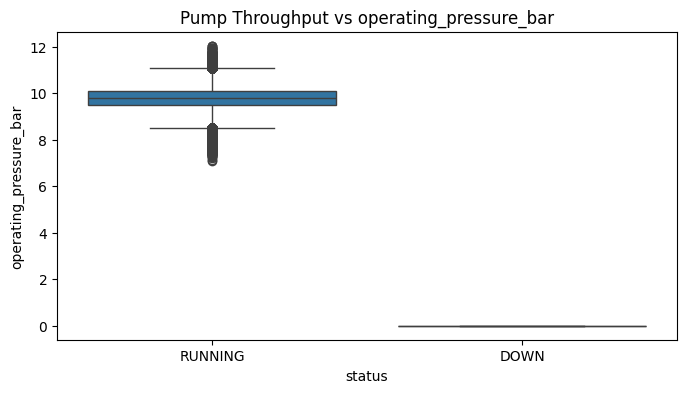

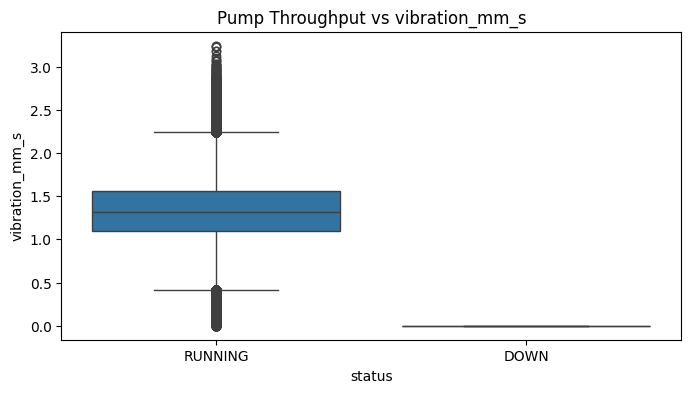

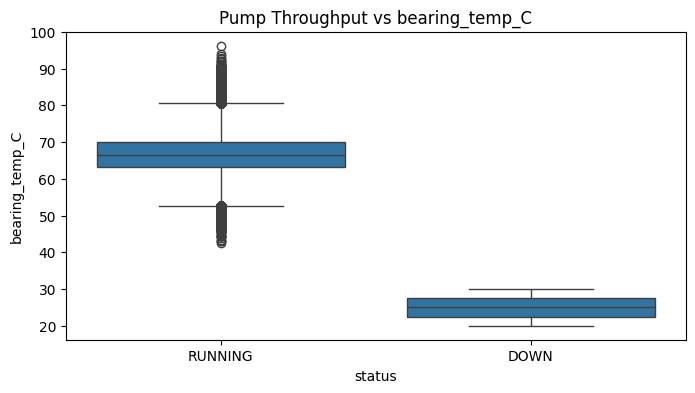

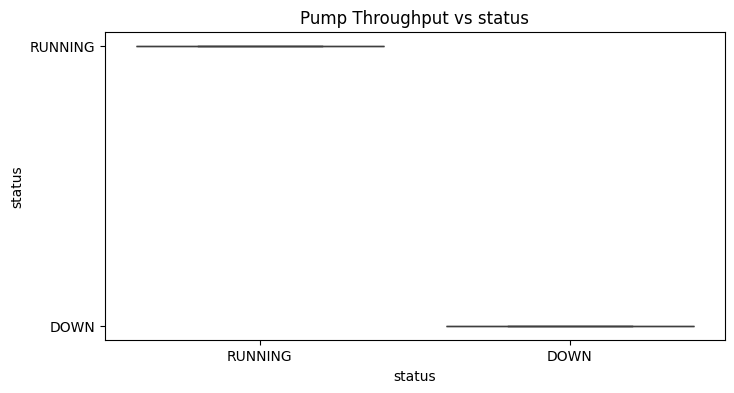

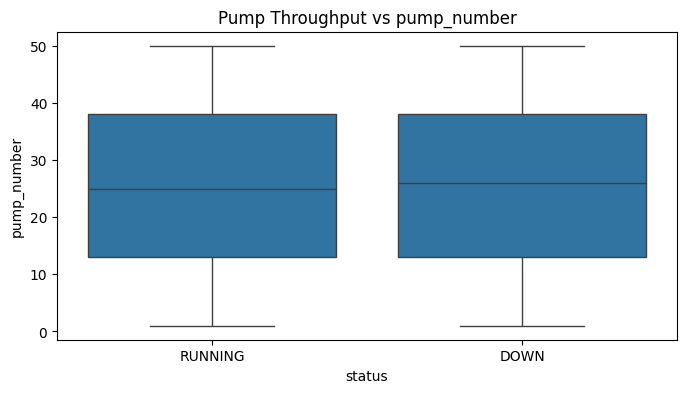

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in features:

    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='status', y=col)
    plt.title(f"Pump Throughput vs {col}")
    plt.ylabel(col)
    plt.show()


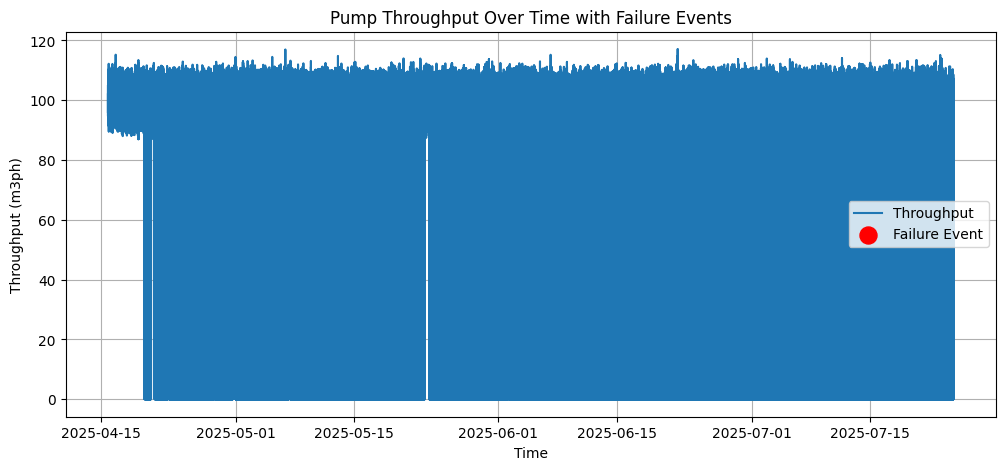

In [67]:
plt.figure(figsize=(12,5))

# plot velocity
plt.plot(df['timestamp'], df['pump_throughput_m3ph'], label='Throughput')

# highlight failure points
failures = df[df['status'] == "FAILURE"]
plt.scatter(failures['timestamp'], failures['pump_throughput_m3ph'], 
            color='red', s=150, label='Failure Event')

plt.title("Pump Throughput Over Time with Failure Events")
plt.xlabel("Time")
plt.ylabel("Throughput (m3ph)")
plt.legend()
plt.grid(True)
plt.show()


### Throughput Behavior Before Failure

In [68]:
print("Throughput Behavior Before Failure")
df.groupby('status')['pump_throughput_m3ph'].describe()


Throughput Behavior Before Failure


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
DOWN,48450.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
RUNNING,671600.0,99.877414,3.402896,84.342294,97.58452,99.876247,102.170001,117.049782


### Pressure Levels vs Status

In [69]:
df.groupby('status')['operating_pressure_bar'].mean()


status
DOWN       0.000000
RUNNING    9.786293
Name: operating_pressure_bar, dtype: float64

### Vibration Patterns Before Failure (Very Important)

In [70]:
df.groupby('status')['vibration_mm_s'].describe()


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
DOWN,48450.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
RUNNING,671600.0,1.333945,0.347205,0.0,1.099321,1.321256,1.555789,3.241878


### Bearing Temperature and Failure Relationship

In [73]:
df.groupby('status')['bearing_temp_C'].mean()


status
DOWN       25.000099
RUNNING    66.682912
Name: bearing_temp_C, dtype: float64

### Time of day 

In [71]:
df['hour'] = df['timestamp'].dt.hour
df.groupby(['hour','status']).size()


hour  status 
0     DOWN        1963
      RUNNING    28037
1     DOWN        1986
      RUNNING    28014
2     DOWN        1987
      RUNNING    28013
3     DOWN        2017
      RUNNING    27983
4     DOWN        2068
      RUNNING    27932
5     DOWN        2121
      RUNNING    27879
6     DOWN        2119
      RUNNING    27881
7     DOWN        2079
      RUNNING    27921
8     DOWN        2091
      RUNNING    27909
9     DOWN        2150
      RUNNING    27850
10    DOWN        2160
      RUNNING    27840
11    DOWN        2125
      RUNNING    27875
12    DOWN        2058
      RUNNING    27942
13    DOWN        2044
      RUNNING    27956
14    DOWN        2038
      RUNNING    27962
15    DOWN        2009
      RUNNING    27991
16    DOWN        1974
      RUNNING    28026
17    DOWN        1957
      RUNNING    28043
18    DOWN        1942
      RUNNING    28058
19    DOWN        1925
      RUNNING    28075
20    DOWN        1905
      RUNNING    28145
21    DOWN        18

## Correlations Between Variables and Status

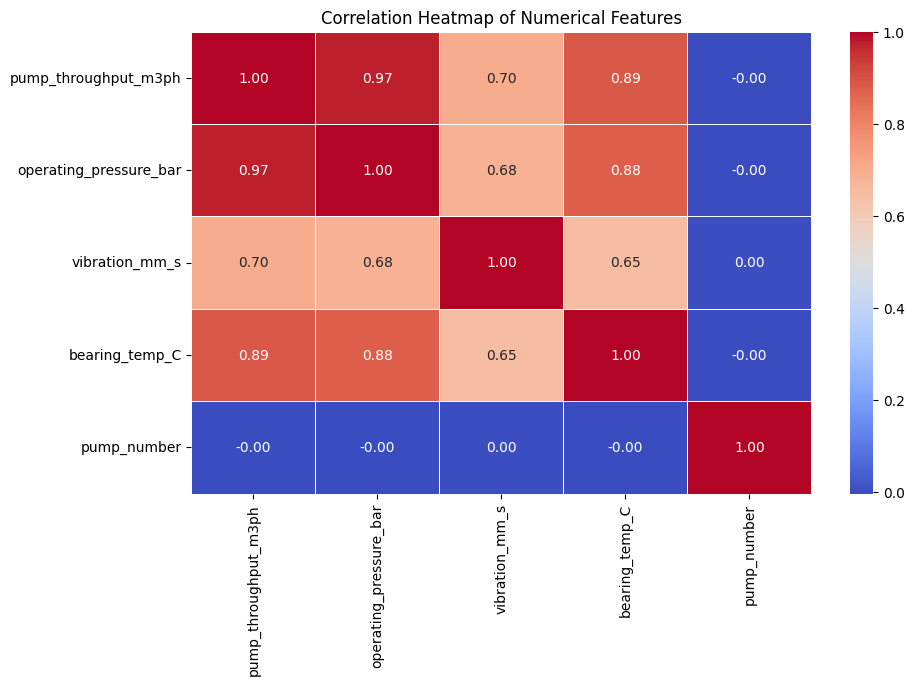

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["pump_throughput_m3ph", "operating_pressure_bar", "vibration_mm_s" , 'bearing_temp_C', 'status', 'pump_number', 'status']
df1 = df[features]

# Compute correlation matrix
corr = df1.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()
